#         project: Investigating a Dataset.
#         Kaggle No-Show appointments.

## Introduction

We will investigate the [Kaggle's,](https://www.kaggle.com/joniarroba/noshowappointments) "No-Show appointments dataset" which collects information from 100k medical appointments in Brazil. 
It is focused mainly on the question of whether or not patients show up for their medical appointment.
we will investigate the dataset to put hands on the main factors affecting whether patients attend their appountment or not.

**We will try to answer questions like,**
* Does the Gender matters in attending the appointment or not?
* Does having a scholarship affects the attendance of a medical appointment?
* Does the Age matters?
* Does receiving an SMS increases the probability of attendance?
* Does the weekday affects the likelihood of attendance?

*We will achieve that by following the standard Data-Analysis process and it's criteria.*
- Data wrangling and cleaning.
- Exploring the data.
- Create visualizations.
- Derive conclusions.

we will be using python numpy and pandas dataframes for this project. Also using the matplotlib library to create visualizations supporting our analysis. And a jupyter notebook to illustrate each step of our analysis.

Let's get Started!

Importing some python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
# Loading the dataset.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
# viewing the first five rows of the data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I think we need to view more data.

In [4]:
# Viewing more data.
df.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
# Checking for duplicates
sum(df.duplicated())

0

well, There are no duplicates. " No row has been entered more than one time"

In [6]:
# How many items do we have?
df.shape

(110527, 14)

In [7]:
# the type of each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
# Specifying the type 'object'
print('The object type of "Gender" is: ' ,type(df['Gender'][0]))
print('The object type of "ScheduledDay" is: ',type(df['ScheduledDay'][0]))
print('The object type of "AppointmentDay" is: ' ,type(df['AppointmentDay'][0]))
print('The object type of "Neighbourhood" is: ' ,type(df['Neighbourhood'][0]))
print('The object type of "No-show" is: ' ,type(df['No-show'][0]))

The object type of "Gender" is:  <class 'str'>
The object type of "ScheduledDay" is:  <class 'str'>
The object type of "AppointmentDay" is:  <class 'str'>
The object type of "Neighbourhood" is:  <class 'str'>
The object type of "No-show" is:  <class 'str'>


In [9]:
# Checking for any null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# getting the number of unique values in each column of the data.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

ok,
- we have about 62.3K patients. This means some patients had more than one appointment.
- There are 81 neighbourhoods involved in this dataset. 
- The data were collected from 27 different days.
*For the Handcap: The Number 5 seems to be tricky, it will need further investigation* 
*Let's see the unique values in the "Handcap" Column*

In [11]:
# getting a list for the unique values in the "Handcap" column.
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
print('The value 0 appeared ',(df['Handcap'] == 0).sum(),' Times')
print('The value 1 appeared ',(df['Handcap'] == 1).sum(),' Times')
print('The value 2 appeared ',(df['Handcap'] == 2).sum(),' Times')
print('The value 3 appeared ',(df['Handcap'] == 3).sum(),' Times')
print('The value 4 appeared ',(df['Handcap'] == 4).sum(),' Times')

The value 0 appeared  108286  Times
The value 1 appeared  2042  Times
The value 2 appeared  183  Times
The value 3 appeared  13  Times
The value 4 appeared  3  Times


By looking at the original Data Source at [Kaggle,](https://www.kaggle.com/joniarroba/noshowappointments) It was mentioned that Handcap is a boolean. 
Then, We will drop the values 2,3,4 from analysis.

In [13]:
# dropping values 2,3,4
df = df[df['Handcap'] != 2]
df = df[df['Handcap'] != 3]
df = df[df['Handcap'] != 4]
df.shape

(110328, 14)

In [14]:
df.describe() # getting some descriptive statistics

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103280e+05,1.103280e+05,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000,110328.000000
mean,1.475273e+14,5.675299e+06,37.070408,0.098280,0.196831,0.071605,0.030382,0.018508,0.321179
std,2.561394e+14,7.129914e+04,23.098231,0.297694,0.397606,0.257833,0.171637,0.134781,0.466931
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174654e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680568e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725510e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


let's focus on the Age column

In [15]:
df['Age'].describe()

count    110328.000000
mean         37.070408
std          23.098231
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

It is not logic to have a minimum age of -1 !!!!

In [16]:
# getting a list of the unique values in the age group.
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  86,
        91,  98,  92,  94,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [17]:
print('The value -1 appeared ',(df['Age'] == -1).sum(),' Times')
print('The value 0 appeared ',(df['Age'] == 0).sum(),' Times')

The value -1 appeared  1  Times
The value 0 appeared  3539  Times


well, What does the Age equals Zero mean?
 >by doing further questionaire on that issue, It popped up the 0 Value is for recently born babies
who have not completed their first year yet.

In [18]:
# dropping Age = -1
df = df[df['Age'] != -1]

### Data types conversion

In [19]:
# converting patientid and AppointmentID to string
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [20]:
# converting from string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# keeping only the date without time for AppointmentDay
df['AppointmentDay'] = df['AppointmentDay'].dt.date

# Create new column for the Weekday
df['weekday'] = df['ScheduledDay'].dt.dayofweek

# converting it to day name instead of a number
df['weekday'] = df['ScheduledDay'].apply(lambda x: pd.datetime.strftime(x, '%A'))


C:\Users\ahmed\AppData\Local\Temp/ipykernel_11104/3419879378.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['weekday'] = df['ScheduledDay'].apply(lambda x: pd.datetime.strftime(x, '%A'))


In [21]:
# converting No-show to numeric boolean
df['No-show'] = df['No-show'].replace({'Yes':1 ,'No':0})

# adding new bool column to the dataframe indicates when an appointment was attended.
df['show'] = df['No-show']== 0
# converting the bool to integar
df['show']= df['show'].astype(int)

## Exploring The Data

First let's see the big picture before we dive into the details.

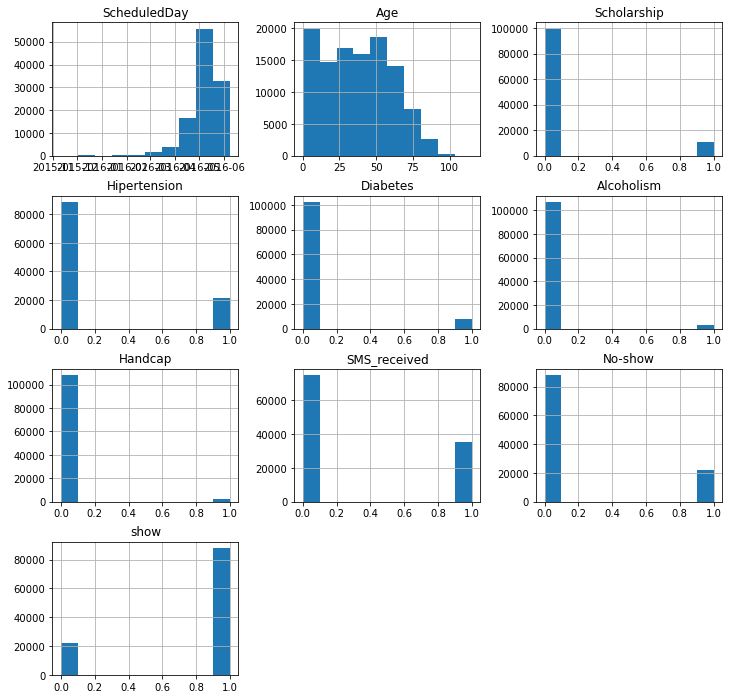

In [22]:
df.hist(figsize= (12,12))
plt.show()

*For first sight, It seems that the following are booleans.* 
* Scholarship: it shows that around 100K appointments don't lie under a Scholarship policy, Only about 10K appointments do.
* Hipertension: it shows that around 90K appointments were not for patients with Hipertension, Only about 20K appointments were.
* Diabetes: it shows that around 100K appointments were not for patients with Diabetes, Only about 10K appointments were.
* Alcoholism: it shows that around 107K appointments were not for patients with Alcoholism, Only about 3K appointments were.
* Handcap: it shows that around 108K appointments were not for Handcapped patients, Only about 2K appointments were.
* SMS_received: it shows that around 75K appointments were not assigned to SMS, Only about 35K appointments were.
* No-Show: it shows that around 85K appointments were attended, Only about 25K were not.

Now it is the time to dive a little deeper at our analysis.

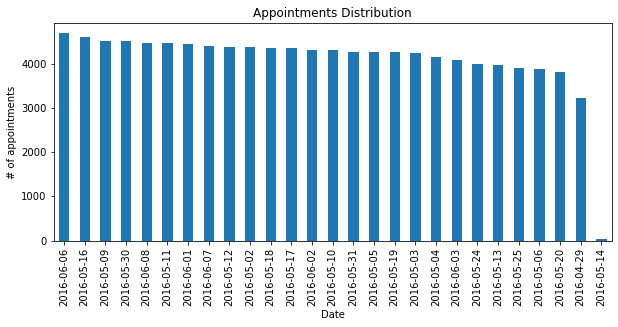

In [23]:
# checking the appointments distribution among days.

# defining a function for the plot
def Barplot(Column,Title,XLabel,YLabel):
    Column.value_counts().plot(kind= 'bar')
    plt.title(Title)
    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.show()
    

# plotting
plt.figure(figsize=(10,4))
Barplot(df['AppointmentDay'],'Appointments Distribution','Date','# of appointments')

from the previous plot, we can say there is not a big difference of the appointments distribution among the 27 days.

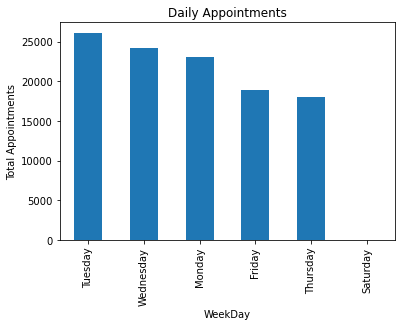

In [24]:
# Appointments distribution among weekdays
Barplot(df['weekday'], 'Daily Appointments', 'WeekDay','Total Appointments')

*For the above plot,*
* Too few apointments on weekends.
* Too few on Saturday and None on sunday.

In [25]:
# getting value counts
df['weekday'].value_counts()

Tuesday      26111
Wednesday    24223
Monday       23044
Friday       18881
Thursday     18044
Saturday        24
Name: weekday, dtype: int64

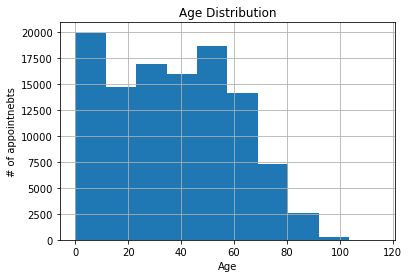

In [26]:
# viewing the appointments distribution vs Age
df['Age'].hist()

# defining plot charactrisrics
def plot_charact(TITLE,XLABEL,YLABEL):
    plt.title(TITLE)
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.show()

plot_charact('Age Distribution', 'Age', '# of appointnebts')


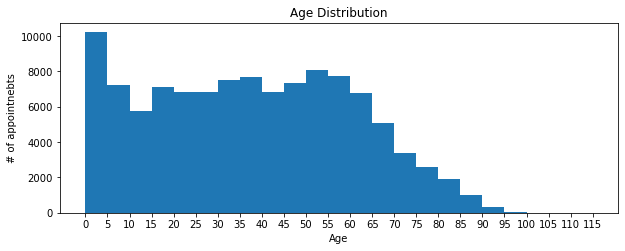

In [27]:
# We need to refine the previous chart to get more details.
plt.hist(df['Age'], bins=23)
plt.xticks(np.arange(0,116,5))
plt.gcf().set_size_inches(10, 3.5)
plot_charact('Age Distribution', 'Age', '# of appointnebts')

In [28]:
# Creating new column for the age groups
bins = [0,3,13,20,40,65,120]
labels = ['baby', 'kid', 'teen', 'youth', 'adult', 'old']
df['age_groups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

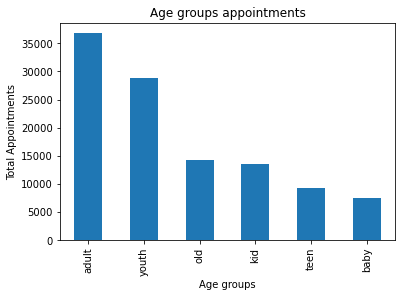

In [29]:
# creating bar plot for the age group
Barplot(df['age_groups'],'Age groups appointments', 'Age groups', 'Total Appointments')

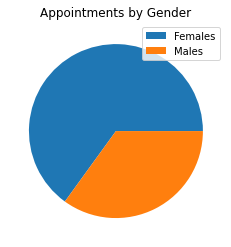

In [30]:
# defining the pie function
def pieplot(Column,Title,Legend):
    plt.pie(Column.value_counts())
    plt.title(Title)
    plt.legend(Legend)
    plt.show()

pieplot(df['Gender'],'Appointments by Gender',['Females','Males'])

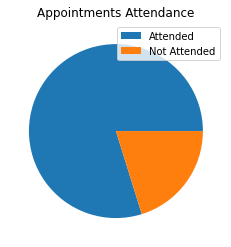

In [31]:
# Attended Appointments
pieplot(df['show'],'Appointments Attendance', ['Attended', 'Not Attended'])

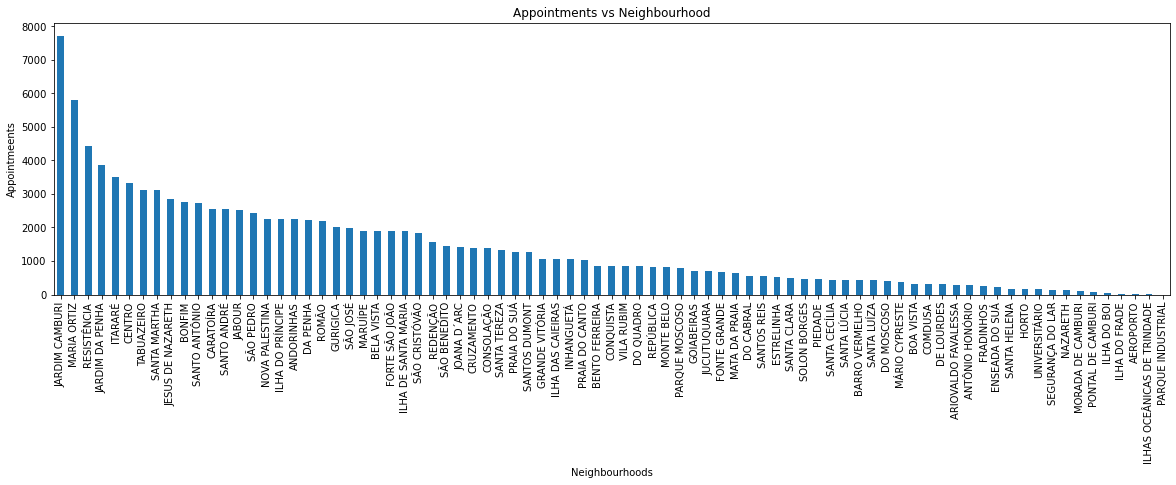

In [32]:
# Appointments distribution among neighbourhoods
plt.figure(figsize=(20,5))
Barplot(df['Neighbourhood'], 'Appointments vs Neighbourhood', 'Neighbourhoods','Appointmeents')

*For the above chart,*

It is obvious that the distribution is right-skewed. which indicates the appointments are not evenly distributed among neighbourhoods. **There is a bias.**

In [33]:
# creating a bool list
bool_list = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'  
            ,'SMS_received']
# groupby Gender
df.groupby('Gender')[bool_list].sum()

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
Gender,,,,,,
F,8840,15290,5580,1223,1181,24177
M,2003,6426,2320,2129,861,11258


<Figure size 576x360 with 0 Axes>

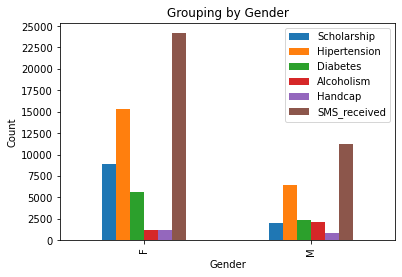

In [34]:
plt.figure(figsize=(8,5))
df.groupby('Gender')[bool_list].sum().plot(kind='bar', title='Grouping by Gender')
plt.ylabel('Count')
plt.yticks(np.arange(0,25001,2500))
plt.show()

The above chart separates the Gender into two groups (F for Females & M for Males).
It shows the difference between each bar on the F group and it's corresponding on the M Group.
for example, The SMS_received bar shows that around 24K females have received an SMS While only about 12K Males have received an SMS.

In [35]:
show_list = ['No-show','show']
df.groupby(['Gender', 'SMS_received'])[show_list].sum()

No-show   show
Gender SMS_received                
F      0                7855  39698
       1                6713  17464
M      0                4648  22691
       1                3062   8196

In [36]:
df['Gender'].value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

In [37]:
df.groupby('SMS_received')[show_list].sum()

,No-show,show
SMS_received,,
0,12503,62389
1,9775,25660


In [38]:
df.groupby('age_groups')[bool_list].sum()

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
age_groups,,,,,,
baby,253,0,2,0,3,1856
kid,1830,12,17,13,73,4304
teen,1313,31,37,18,166,2796
youth,4077,1556,456,665,416,9854
adult,3079,11634,4049,2306,788,12230
old,291,8483,3339,350,596,4395


In [39]:
df.groupby('age_groups')[show_list].sum()

,No-show,show
age_groups,,
baby,1306,6124
kid,2996,10588
teen,2432,6915
youth,6674,22160
adult,6655,30134
old,2215,12128


well, i guess teens are more likely not to attend

In [40]:
sms_noshow_show = ['SMS_received', 'No-show', 'show']
df.groupby('age_groups')[sms_noshow_show].sum()

,SMS_received,No-show,show
age_groups,,,
baby,1856,1306,6124
kid,4304,2996,10588
teen,2796,2432,6915
youth,9854,6674,22160
adult,12230,6655,30134
old,4395,2215,12128


The ratio show / No-show doesn't rely so much on SMS received

In [41]:
df.groupby('weekday')[show_list].sum()

,No-show,show
weekday,,
Friday,3881,15000
Monday,4552,18492
Saturday,1,23
Thursday,3696,14348
Tuesday,5277,20834
Wednesday,4871,19352


The above table indicates that the ratio (show / No-show) doesn't differ too much for weekdays.
Except for saturday which we have too few data-points to build upon it

## Conclusion

* The vast Majourity of the medical appointments was for Females.
* The ratio No-show / show is almost the same for both genders.
* The percentage for women with schoolarships to total women is about 2.5 times that of men.
* Men are more likely to be Handcapped.
* Men are more likely to have Alcholism.
* for the rest, percentage of Dieseases are almost the same for both genders.
* SMS were sent for only about 32% of the total appointments.
* Although they received SMS, 9775 appointments were not attended.
* SMS received attendance ratio is almost the same for both Genders
* Although SMS received do affect appointments attendance, they do not have much weight.
* Teenages(13:19) are more likely not to attend their appointments. 
* Although we have only 24 appointments on saturdays among our data, 23 of them were attended and only one were not attended. so, patients are more likely to attend medical appointnebts on weekends as they have free time.

**Limitations**
* Medical appointments are right-skewed for the Neighbourhoods (There is a bias). It should be evenly distributed among neighbourhoods.
* Too few data for weekends, only 24 appointments on saturdays from the whole 110K appointment and none for sunday.
* Appointments for females are almost twice that for men